In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

# %matplotlib inline
# %precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set seed for reproducibility
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import ma2
from elfi.methods.parameter_inference import ROMC
model = ma2.get_model(seed_obs=seed)

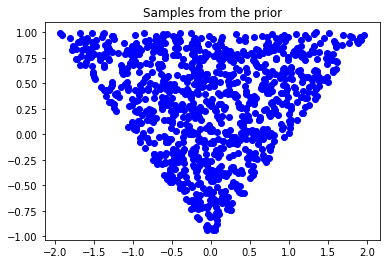

In [11]:
x = model.generate(1000, outputs=['t1', 't2'])

plt.figure()
plt.title("Samples from the prior")
plt.plot(x["t1"], x["t2"], "bo")
plt.show()


# Training part, using gradient-based optimisation

In [12]:
bounds = [(-2,2), (-2,2)]
romc = ROMC(model, bounds=bounds, discrepancy_name="d")

In [13]:
n1 = 300
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems using a gradient-based method ###
Time: 10.973 sec===========================================-] 99.7% Complete
Time: 10.973 sec


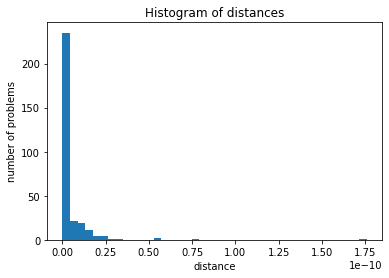

In [14]:
romc.distance_hist(bins=40)

In [15]:
eps_filter = .02
romc.estimate_regions(eps_filter=eps_filter, fit_models=True, eps_cutoff=0.1)

Total solutions: 300, Accepted solutions after filtering: 300
### Estimating regions ###

Time: 5.724 sec ===========================================-] 99.7% Complete

### Fitting local models ###

Time: 8.868 sec ===========================================-] 99.7% Complete



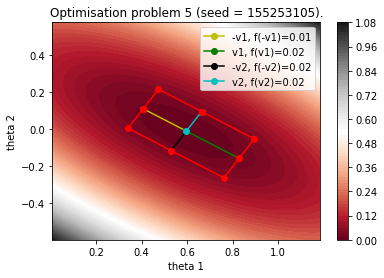

In [16]:
romc.visualize_region(5)

In [17]:
n2 = 50
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Time: 16.835 sec ====================================================================================-] 100.0% 



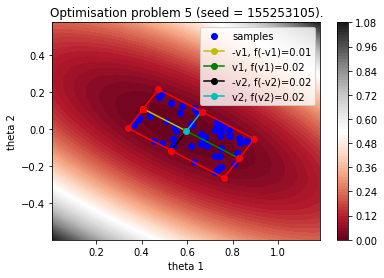

In [18]:
# As before but now it plots the samples as well
romc.visualize_region(5)

# Rejection ABC - used as ground-truth information

In [44]:
N=10000
rej = elfi.Rejection(model, discrepancy_name="d", batch_size=10000, seed=seed)
vis = dict(xlim=[-2,2], ylim=[-1,1])
%time result = rej.sample(N, threshold=.1)

Progress [==================================================] 100.0% Complete
CPU times: user 4.54 s, sys: 455 ms, total: 5 s
Wall time: 4.98 s


array([<AxesSubplot:xlabel='t1'>, <AxesSubplot:xlabel='t2'>], dtype=object)

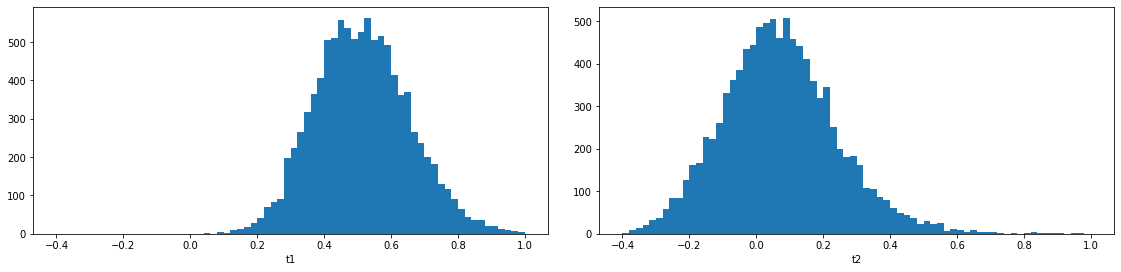

In [20]:
result.plot_marginals(range=[-.4,1], bins=70)

In [47]:
print(result.sample_means_array)
print(np.cov(result.samples_array.T))

[0.51396546 0.07055017]
[[0.01998835 0.0030093 ]
 [0.0030093  0.0299338 ]]


[]

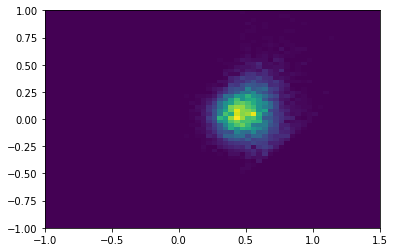

In [22]:
plt.figure()
plt.hist2d(result.samples_array[:,0], result.samples_array[:,1], bins=60, range=[(-1, 1.5), (-1,1)], weights=result.weights)
plt.plot(block=False)

# ROMC Evaluation

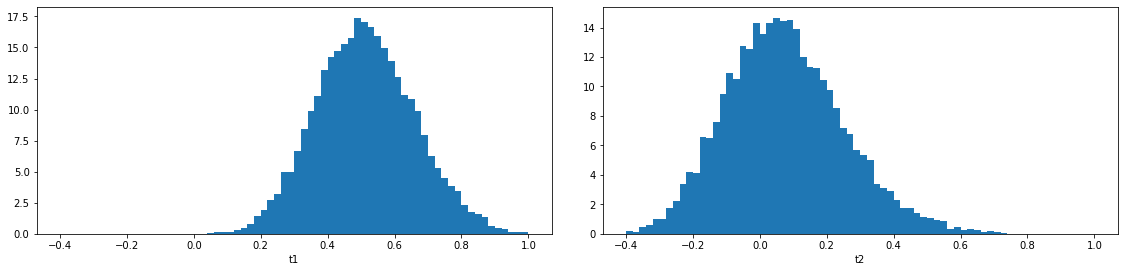

In [27]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

In [49]:
print(romc.result.sample_means_array)
print(romc.result.samples_cov())

[0.51346823 0.07479963]
[[0.02162436 0.0011972 ]
 [0.0011972  0.03091618]]


[]

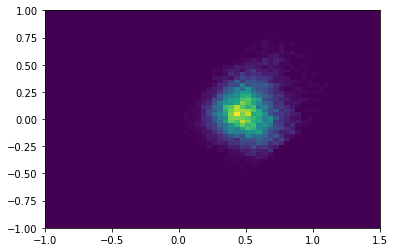

In [25]:
plt.figure()
plt.hist2d(romc.result.samples_array[:,0], romc.result.samples_array[:,1], bins=60, range=[(-1, 1.5), (-1,1)], weights=romc.result.weights)
plt.plot(block=False)

In [26]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(-1, 1.5, nof_points)
    th2 = np.linspace(-1, 1, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contour(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_posterior, nof_points=80)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

# Training Part, using Bayesian Optimisation

In [55]:
bounds = [(-2,2), (-2,2)]
romc = ROMC(model, bounds=bounds, discrepancy_name="d")

In [56]:
n1 = 100
seed = 21
romc.solve_problems(n1=n1, seed=seed, use_bo=True)

### Solving problems using Bayesian optimisation ###


 /home/givasile/miniconda3/envs/elfi_ROMC/lib/python3.5/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 409.201 sec
Time: 409.201 sec


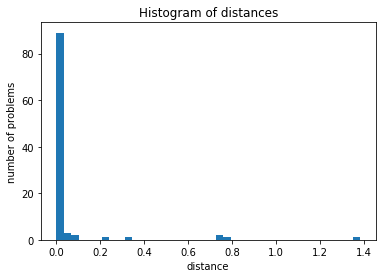

In [57]:
romc.distance_hist(bins=40)

In [58]:
eps_filter = .02
romc.estimate_regions(eps_filter=eps_filter, fit_models=True, eps_cutoff=0.1)

Total solutions: 100, Accepted solutions after filtering: 88
### Estimating regions ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 0.997 sec 

### Fitting local models ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 0.947 sec 



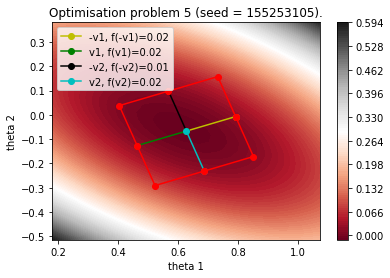

In [59]:
romc.visualize_region(5)

In [60]:
n2 = 50
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 4.628 sec 



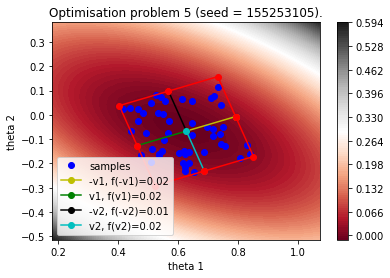

In [61]:
# As before but now it plots the samples as well
romc.visualize_region(5)

# Evaluation

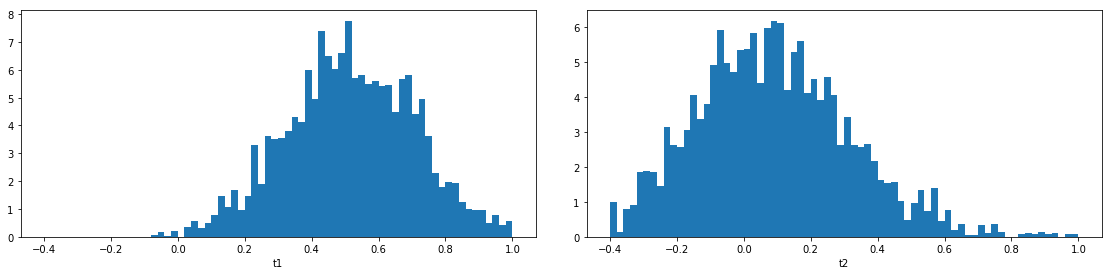

In [62]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

In [63]:
romc.result.summary()

Method: ROMC
Number of samples: 4400
Sample means: t1: 0.52, t2: 0.0826


[]

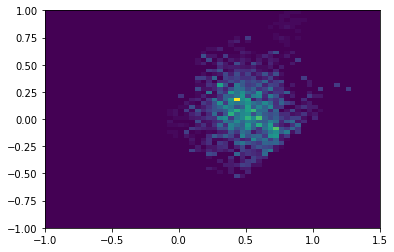

In [64]:
plt.figure()
plt.hist2d(romc.result.samples_array[:,0], romc.result.samples_array[:,1], bins=60, range=[(-1, 1.5), (-1,1)], weights=romc.result.weights)
plt.plot(block=False)

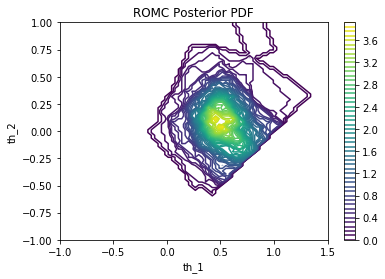

In [65]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(-1, 1.5, nof_points)
    th2 = np.linspace(-1, 1, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contour(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_posterior, nof_points=80)